# Predicting sentiment from product reviews

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
os.getcwdb()

b'/Users/kunxu/Documents/Python_jobs/ML_UW/ML_Foundation/week3'

## Load data and explore the dataset

In [3]:
products = pd.read_csv('amazon_baby.csv',dtype={'name':str,'review':str,'rating':int})

In [5]:
products.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


## Assignment

### Question 1 and 2 - word count

In [13]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

In [20]:
products = products.fillna({'review':''}) 

In [27]:
'''
Approach 1 - use maketrans
If there are two arguments, they must be strings of equal length, 
each character in x will be mapped to the character at the same position in y. 
If there is a third argument, it must be a string, whose characters will be mapped to None in the result.
'''
def remove_punctuation(text):
    import string    
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [28]:
products['review_word_count'] = products['review'].astype(str).apply(remove_punctuation)

In [ ]:
products.head()

In [29]:
for word in selected_words:
    products[word] = products['review_word_count'].apply(lambda s : s.split().count(word))

In [30]:
products.head()

,name,review,rating,word_count,review_word_count,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,"{'12': 1, 'about': 1, 'also': 1, 'and': 5, 'ar...",These flannel wipes are OK but in my opinion n...,0,0,0,0,0,0,0,0,0,0,0
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'and': 3, 'bags': 1, 'came': 1, 'disappointed...",it came early and was not disappointed i love ...,0,0,0,0,1,0,0,0,0,0,0
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'and': 2, 'anyone': 1, 'bed': 1, 'comfortable...",Very soft and comfortable and warmer than it l...,0,0,0,0,0,0,0,0,0,0,0
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'about': 1, 'and': 3, 'anything': 1, 'approac...",This is a product well worth the purchase I h...,0,0,0,0,2,0,0,0,0,0,0
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'all': 2, 'allow': 1, 'an': 1, 'and': 2, 'bin...",All of my kids have cried nonstop when I tried...,0,1,0,0,0,0,0,0,0,0,0


In [31]:
for word in selected_words:
    print(word,(products[word].sum()))

awesome 3234
great 49419
fantastic 1506
amazing 2233
love 34584
horrible 1057
bad 4602
terrible 1092
awful 626
wow 111
hate 1118


In [32]:
'''
Use countvectorizer in sklearn
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
'''
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
products['review'] = products['review'].fillna('')
count_vectorizer = CountVectorizer()
analyzer = count_vectorizer.build_analyzer()

In [37]:
#approach a
def count_words(doc):
    dic = {}
    if analyzer(doc):
        M = count_vectorizer.fit_transform([doc]).toarray()[0]
        for word,index in count_vectorizer.vocabulary_.items():
            dic[word] = M[index]
    return dic

In [38]:
products['count_words'] = products['review'].apply(count_words)

In [39]:
products.head()

,name,review,rating,word_count,review_word_count,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,count_words
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,"{'12': 1, 'about': 1, 'also': 1, 'and': 5, 'ar...",These flannel wipes are OK but in my opinion n...,0,0,0,0,0,0,0,0,0,0,0,"{'these': 1, 'flannel': 1, 'wipes': 4, 'are': ..."
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'and': 3, 'bags': 1, 'came': 1, 'disappointed...",it came early and was not disappointed i love ...,0,0,0,0,1,0,0,0,0,0,0,"{'it': 3, 'came': 1, 'early': 1, 'and': 3, 'wa..."
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'and': 2, 'anyone': 1, 'bed': 1, 'comfortable...",Very soft and comfortable and warmer than it l...,0,0,0,0,0,0,0,0,0,0,0,"{'very': 1, 'soft': 1, 'and': 2, 'comfortable'..."
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'about': 1, 'and': 3, 'anything': 1, 'approac...",This is a product well worth the purchase I h...,0,0,0,0,2,0,0,0,0,0,0,"{'this': 4, 'is': 4, 'product': 2, 'well': 1, ..."
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'all': 2, 'allow': 1, 'an': 1, 'and': 2, 'bin...",All of my kids have cried nonstop when I tried...,0,1,0,0,0,0,0,0,0,0,0,"{'all': 2, 'of': 1, 'my': 1, 'kids': 2, 'have'..."


In [40]:
#approach b
def word_counts(s):
    ans = {}
    if analyzer(s):
        di = {}
        weight = count_vectorizer.fit_transform([s]).toarray()
        voc = count_vectorizer.vocabulary_
        for k,v in voc.items():
            di[v]=k
        for index,i in enumerate(weight[0]):
            ans[di[index]] = i
    return  ans

In [41]:
products['word_count'] = products['review'].apply(word_counts)

In [44]:
products.head()

,name,review,rating,word_count,review_word_count,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,count_words
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,"{'12': 1, 'about': 1, 'also': 1, 'and': 5, 'ar...",These flannel wipes are OK but in my opinion n...,0,0,0,0,0,0,0,0,0,0,0,"{'these': 1, 'flannel': 1, 'wipes': 4, 'are': ..."
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'and': 3, 'bags': 1, 'came': 1, 'disappointed...",it came early and was not disappointed i love ...,0,0,0,0,1,0,0,0,0,0,0,"{'it': 3, 'came': 1, 'early': 1, 'and': 3, 'wa..."
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'and': 2, 'anyone': 1, 'bed': 1, 'comfortable...",Very soft and comfortable and warmer than it l...,0,0,0,0,0,0,0,0,0,0,0,"{'very': 1, 'soft': 1, 'and': 2, 'comfortable'..."
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'about': 1, 'and': 3, 'anything': 1, 'approac...",This is a product well worth the purchase I h...,0,0,0,0,2,0,0,0,0,0,0,"{'this': 4, 'is': 4, 'product': 2, 'well': 1, ..."
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'all': 2, 'allow': 1, 'an': 1, 'and': 2, 'bin...",All of my kids have cried nonstop when I tried...,0,1,0,0,0,0,0,0,0,0,0,"{'all': 2, 'of': 1, 'my': 1, 'kids': 2, 'have'..."


In [42]:
def selected_count(dic,word):
    if word in dic:
        return dic[word]
    else:
        return 0

In [43]:
for word in selected_words:
    print(word,(products[word].sum()))

awesome 3234
great 49419
fantastic 1506
amazing 2233
love 34584
horrible 1057
bad 4602
terrible 1092
awful 626
wow 111
hate 1118


### Question 3 and 4 - coeffcients

In [18]:
#Define positive/negative segment
products = products[products['rating'] != 3]
products['sentiment'] = products['rating'] >=4

In [58]:
products.head()

,name,review,rating,review_word_count,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,word_count,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...,0,0,0,0,1,0,0,0,0,0,0,"{'and': 3, 'bags': 1, 'came': 1, 'disappointed...",True
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...,0,0,0,0,0,0,0,0,0,0,0,"{'and': 2, 'anyone': 1, 'bed': 1, 'comfortable...",True
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase I h...,0,0,0,0,2,0,0,0,0,0,0,"{'about': 1, 'and': 3, 'anything': 1, 'approac...",True
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried nonstop when I tried...,0,1,0,0,0,0,0,0,0,0,0,"{'all': 2, 'allow': 1, 'an': 1, 'and': 2, 'bin...",True
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,When the Binky Fairy came to our house we didn...,0,1,0,0,0,0,0,0,0,0,0,"{'about': 2, 'adorable': 1, 'and': 2, 'any': 2...",True


In [19]:
products['rating'].value_counts()

5    107054
4     33205
1     15183
2     11310
Name: rating, dtype: int64

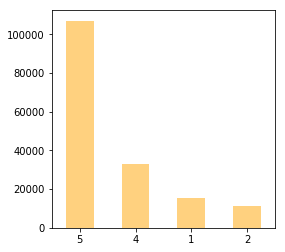

In [21]:
products['rating'].value_counts().plot(kind='bar',color='orange',alpha=0.5,figsize=(4, 4), rot=0)

In [22]:
#train the sentiment classifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [31]:
train_data,test_data = train_test_split(products,train_size=0.8,random_state=0)
features = selected_words

In [32]:
selected_words_model = LogisticRegression()

In [33]:
X = train_data[features]
y = train_data['sentiment']

In [35]:
selected_words_model=selected_words_model.fit(X,y)

In [ ]:
#selected_words_model.coef_
#print(selected_words)
#weight=selected_words_model.coef_
#weight.reshape(-1,1).tolist()

In [36]:
coeff = pd.DataFrame({'name':selected_words,'value':selected_words_model.coef_[0]})

In [37]:
coeff.sort_values(by='value',ascending=False)

,name,value
4,love,1.321798
0,awesome,1.097687
3,amazing,1.023621
2,fantastic,0.816834
1,great,0.757639
9,wow,-0.548452
6,bad,-0.951260
10,hate,-1.384499
8,awful,-1.994745
7,terrible,-2.072084


### Question 5-7 Accuracy 

In [62]:
train_data,test_data = train_test_split(products,train_size=0.8,random_state=0)
features = selected_words

In [63]:
sentiment_model = LogisticRegression()
vectorizer.fit(products['review'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [64]:
X2 = vectorizer.transform(train_data['review'])
y2 = train_data['sentiment']
sentiment_model.fit(X2,y2)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
def metric_roc_curve(fpr,tpr,roc_auc):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [41]:
pred = sentiment_model.predict_proba(vectorizer.transform(test_data['review']))[:,1]

In [42]:
fpr,tpr,_ = roc_curve(test_data['sentiment'].values,pred)
roc_auc = auc(fpr,tpr)

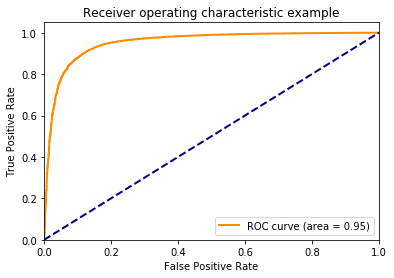

In [43]:
metric_roc_curve(fpr,tpr,roc_auc)

In [65]:
#Accuracy score
from sklearn.metrics import accuracy_score

In [66]:
selected_words_model = LogisticRegression()

In [67]:
X3 = train_data[features]
y3 = train_data['sentiment']

In [68]:
selected_words_model.fit(X3,y3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
sentiment_model_pred = sentiment_model.predict(vectorizer.transform(test_data['review']))

In [46]:
accuracy_score(test_data['sentiment'],sentiment_model_pred)

0.9291475517975473

In [47]:
selected_words_model_pred = selected_words_model.predict(test_data[features])

In [48]:
accuracy_score(test_data['sentiment'],selected_words_model_pred)

0.843213097058559

In [49]:
test_data['sentiment'].describe()

count     33351
unique        2
top        True
freq      27989
Name: sentiment, dtype: object

In [52]:
accuracy_score(test_data['sentiment'],np.ones(test_data['sentiment'].shape))

0.8392252106383616

### Quesiton 9 - 11 Baby Trend Diaper Champ

In [53]:
diaper_champ_reviews = products[products.name=='Baby Trend Diaper Champ']

In [69]:
diaper_champ_reviews['predicted_sentiment']= sentiment_model.predict_proba(vectorizer.transform(diaper_champ_reviews['review']))[:,1]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
diaper_champ_reviews.sort_values(by='predicted_sentiment',ascending=False)

,name,review,rating,review_word_count,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,word_count,sentiment,predicted_sentiment,predicted_sentiment2
376,Baby Trend Diaper Champ,"This is absolutely, by far, the best diaper pa...",5,This is absolutely by far the best diaper pail...,0,0,0,0,2,0,0,0,0,0,0,"{'about': 5, 'absolutely': 1, 'after': 1, 'an'...",True,1.000000,0.983205
320,Baby Trend Diaper Champ,I originally put this item on my baby registry...,5,I originally put this item on my baby registry...,0,0,0,0,0,0,0,0,0,0,0,"{'10': 1, 'about': 2, 'again': 1, 'air': 1, 'a...",True,1.000000,0.806299
414,Baby Trend Diaper Champ,We have been using our Diaper Champ for almost...,5,We have been using our Diaper Champ for almost...,0,0,0,0,0,0,0,0,0,0,0,"{'14': 1, '2005': 1, 'advice': 1, 'all': 3, 'a...",True,1.000000,0.806299
571,Baby Trend Diaper Champ,We did alot of research on diaper pails before...,2,We did alot of research on diaper pails before...,0,0,0,0,0,0,0,0,0,0,0,"{'about': 4, 'advantages': 1, 'after': 2, 'alo...",False,1.000000,0.806299
420,Baby Trend Diaper Champ,Baby Luke can turn a clean diaper to a dirty d...,5,Baby Luke can turn a clean diaper to a dirty d...,0,0,0,0,0,0,0,0,0,0,0,"{'absolutly': 2, 'added': 1, 'all': 1, 'and': ...",True,1.000000,0.806299
451,Baby Trend Diaper Champ,"As a first time mother, I wanted to get the be...",5,As a first time mother I wanted to get the bes...,0,0,0,0,1,0,0,0,0,0,0,"{'able': 2, 'and': 2, 'any': 1, 'around': 1, '...",True,1.000000,0.939797
328,Baby Trend Diaper Champ,Diaper Champ or Diaper Genie? That was my dile...,5,Diaper Champ or Diaper Genie That was my dilem...,0,0,0,0,0,0,0,0,0,0,0,"{'all': 1, 'am': 1, 'and': 6, 'any': 1, 'appea...",True,0.999999,0.806299
604,Baby Trend Diaper Champ,I have been using this diaper pail for 41/2 mo...,5,I have been using this diaper pail for 412 mon...,0,2,0,0,1,0,0,0,0,0,0,"{'41': 1, 'all': 1, 'am': 1, 'and': 4, 'are': ...",True,0.999999,0.986118
491,Baby Trend Diaper Champ,I can\'t say enough good things about the Cham...,5,I cant say enough good things about the Champ ...,0,0,0,0,1,0,0,0,0,0,0,"{'about': 1, 'according': 1, 'an': 1, 'and': 5...",True,0.999999,0.939797
477,Baby Trend Diaper Champ,The boy is now 1 year old and we have had it s...,4,The boy is now 1 year old and we have had it s...,0,1,0,0,0,0,1,0,0,0,0,"{'4out': 1, 'able': 1, 'about': 1, 'admit': 1,...",True,0.999998,0.774259


In [73]:
diaper_champ_reviews['predicted_sentiment2']= selected_words_model.predict_proba(diaper_champ_reviews[features])[:,1]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
diaper_champ_reviews.sort_values(by='predicted_sentiment2',ascending=False)

,name,review,rating,review_word_count,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,word_count,sentiment,predicted_sentiment,predicted_sentiment2
446,Baby Trend Diaper Champ,I received my Diaper Champ at my baby shower f...,5,I received my Diaper Champ at my baby shower f...,0,0,0,0,3,0,0,0,0,0,0,"{'11': 1, 'after': 1, 'ago': 1, 'and': 4, 'any...",True,0.992577,0.995466
426,Baby Trend Diaper Champ,I love this diaper pale and wouldn\'t dream of...,5,I love this diaper pale and wouldnt dream of t...,0,2,0,0,1,0,0,0,0,0,0,"{'and': 3, 'anything': 1, 'buy': 1, 'can': 1, ...",True,0.995366,0.986118
604,Baby Trend Diaper Champ,I have been using this diaper pail for 41/2 mo...,5,I have been using this diaper pail for 412 mon...,0,2,0,0,1,0,0,0,0,0,0,"{'41': 1, 'all': 1, 'am': 1, 'and': 4, 'are': ...",True,0.999999,0.986118
456,Baby Trend Diaper Champ,I love this diaper pail. It keeps the diapers ...,4,I love this diaper pail It keeps the diapers f...,0,0,0,0,2,0,0,0,0,0,0,"{'also': 1, 'and': 1, 'bags': 2, 'bucks': 1, '...",True,0.999211,0.983205
573,Baby Trend Diaper Champ,I love this diaper pail! It\'s so easy to use...,5,I love this diaper pail Its so easy to use an...,0,0,0,0,2,0,0,0,0,0,0,"{'and': 3, 'any': 2, 'bag': 1, 'being': 1, 'bu...",True,0.986437,0.983205
459,Baby Trend Diaper Champ,"Love it, love it, love it! This lives up to t...",5,Love it love it love it This lives up to the ...,0,0,0,0,2,0,0,0,0,0,0,"{'all': 1, 'already': 1, 'also': 1, 'any': 1, ...",True,0.994649,0.983205
559,Baby Trend Diaper Champ,I\'ve worked with kids more than half my life....,5,Ive worked with kids more than half my life Fi...,0,0,0,0,2,0,0,0,0,0,0,"{'all': 1, 'always': 1, 'and': 4, 'annoying': ...",True,0.999993,0.983205
322,Baby Trend Diaper Champ,We had 2 diaper Genie\'s both given to us as a...,4,We had 2 diaper Genies both given to us as a g...,0,0,0,0,2,0,0,0,0,0,0,"{'acutally': 1, 'also': 2, 'and': 6, 'are': 3,...",True,0.990688,0.983205
376,Baby Trend Diaper Champ,"This is absolutely, by far, the best diaper pa...",5,This is absolutely by far the best diaper pail...,0,0,0,0,2,0,0,0,0,0,0,"{'about': 5, 'absolutely': 1, 'after': 1, 'an'...",True,1.000000,0.983205
497,Baby Trend Diaper Champ,I have a two-year-old son and I love the Diape...,5,I have a twoyearold son and I love the Diaper ...,0,0,0,0,2,0,0,0,0,0,0,"{'and': 6, 'bag': 1, 'bought': 1, 'broke': 1, ...",True,0.955081,0.983205
